## <img style="float: left; padding-right: 10px; width: 45px" src="http://www.ufopa.edu.br/media/file/site/ufopa/imagens/2018/f277f8862c1cc28b26ed9525312ccbfa.jpg"> T02 -  Buscar um problema real para usar IA como solução e aplicar Análise Exploratória e Tratamento de Dados
## Disciplina: Inteligência Artificial

**Bacharelado em Sistemas de Informação**<br>
**Turma: 2019**<br>
**Professora:** Dra. Flávia Monteiro <br>
**Alunos:** Crystian Printes Cativo <br>
            Raiane da Silva Coimbra<br>
            
---

In [2]:
#Execute esta celula
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

## Instalando as bibliotecas necessárias
---

In [3]:
# import as bibliotecas necessárias
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report 


import sklearn as skl

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format ='retina'

## Classificando doenças de pele
**Dataset: Câncer de pele MNIST: HAM10000.**<br>
**Infomações do dataset:**<br>

**1** - Lesion_id<br>
**2** - Image_id<br>
**3** - Dx (tipo de doença de pele) = 
    **nv:** nevos melanocíticos<br>
    **mel:** Melanoma<br>
    **bkl:** Lesões tipo ceratose benigna<br>
    **bcc:** carcinoma basocelular<br>
    **akiec:** ceratoses actínicas<br>
    **vasc:** lesões vasculares<br>
    **df:** Dermatofibroma<br>
**4** - Dx_type (como a doença foi descoberta) =<br>
    **histo** - histopatologia<br>
    **follow_up** - exame de acompanhamento<br>
    **consenso** - consenso de especialistas<br>
    **confocal** - confirmação por microscopia confocal in vivo<br>
**5** - Age<br>
**6** - Sex<br>
**7** -Localization<br>

In [4]:
cancer = pd.read_csv("HAM10000_metadata.csv")
cancer.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


---
## Listando todas as colunas do meu dataset.

In [5]:
cancer.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

## Conhecendo melhor o nosso dataset.
**Com o codigo abaixo podemos coletar as seguintes informações**:<br>
**Colunas:** 7 colunas(0 à 6);<br>
**Entradas:** 10015 entradas(0 à 10014);<br>
**tipo de dados** Float64(1) e object/string(6)

In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


---
**Usando a função '.describe' da lib do pandas**<br>
Ao executar a celula abaixo, obteremos os seguintes dados:<br>
**Count:** Quantidade total de dados;<br>
**mean:** A média de cada coluna quantitativa;<br>
**std:** o desvio padrão;<br>
**min:** Valor minimo de cada coluna;<br>
**O que é um Quartil?**<br>
Quartis é a divisão do conjunto de dados em 4 partes, ou seja, em pedaços de tamanhos iguais que contém 25% dos dados.<br>
**1º Quatil:** 25% do dados de cada coluna;<br>
**2º Quatil/mediana:** 50% do dados de cada coluna;<br>
**3º Quatil:** 75% do dados de cada coluna;<br>
**max:** Valor maximo de cada coluna;<br>

In [7]:
cancer.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


---
## Uma análise estatística geral dos valores numéricos do conjunto de dados onde  temos apenas a coluna age (idade) como quantitativo.

**Limpeza de Dados**<br>
Verificando e removendo valores NULL

In [8]:
cancer.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

A coluna 'age' apresentou 57 registros nulos. Nesse caso, precisamos substituí-los pela média de 'age', evitando assim a perda de dados.

In [9]:
cancer['age'].fillna(int(cancer['age'].mean()),inplace=True)

In [10]:
cancer.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

Valores nulos removidos!

---
## Gráfico de distribuição das doenças
**Regiões do corpo afetadas**

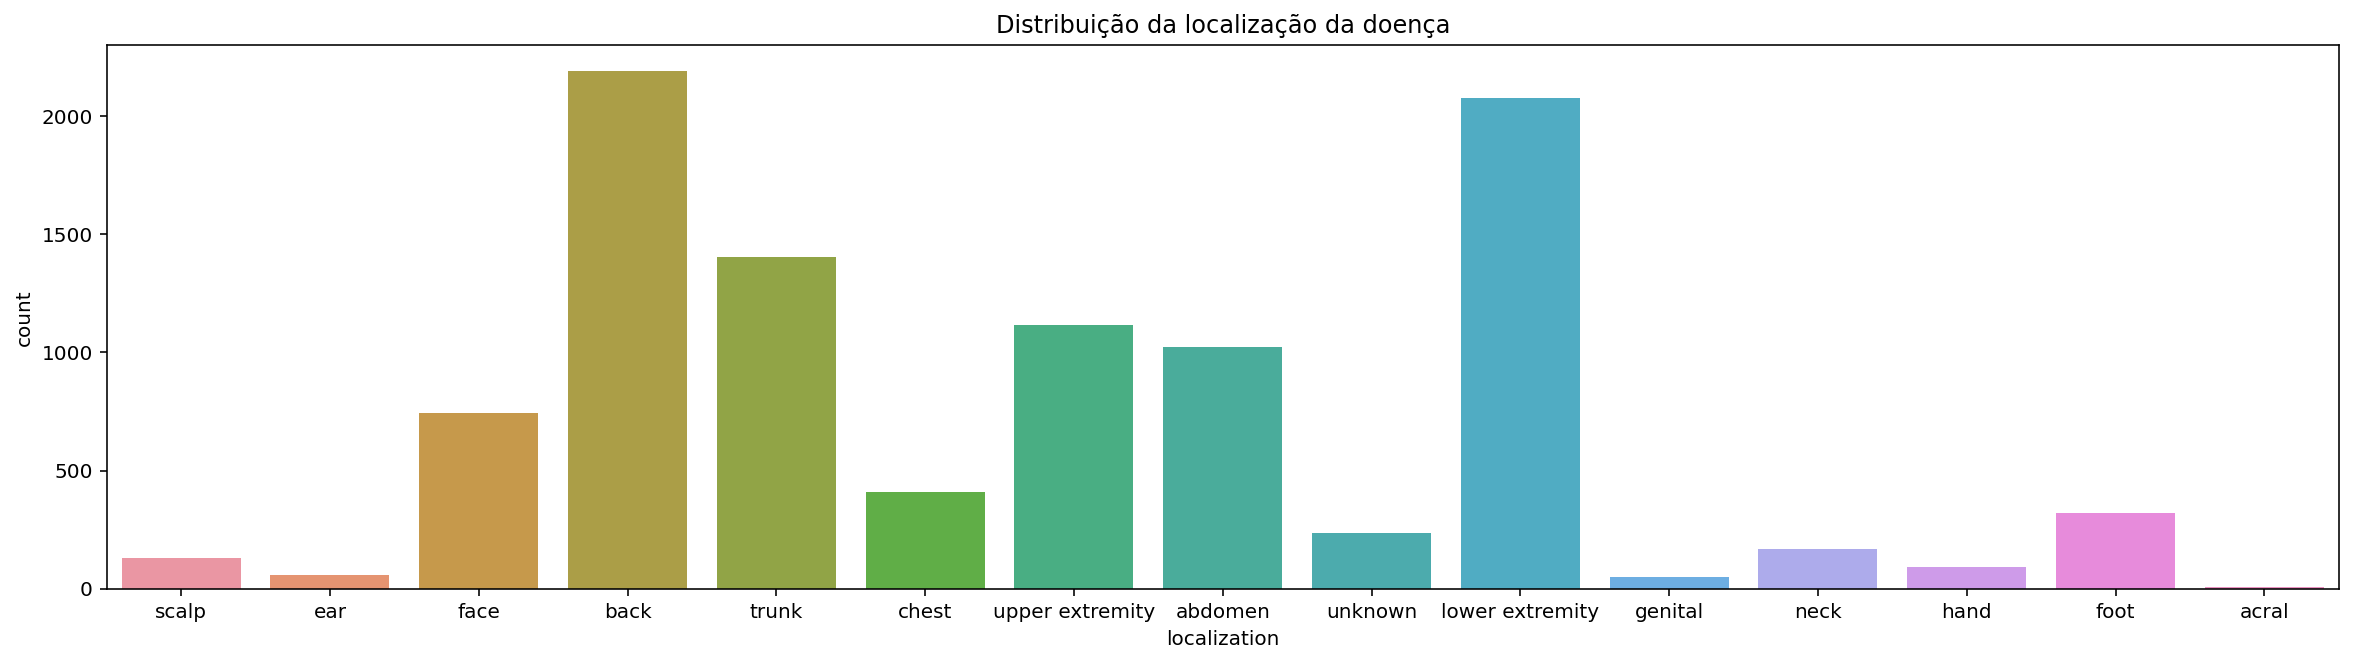

In [11]:
# Gráfico da distribuição da doença em diferentes partes do corpo
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
sns.countplot(x = 'localization', data = cancer)
plt.title('Distribuição da localização da doença')
plt.show()

Com o resultado mostrado no gáfico acima, podemos perceber que grande parte das doenças de pele são encontradas nas costas e em extremidade mais baixa das pessoas.

---
**Diferentes tipos de doença de pele**

In [12]:
# Distribuição de doenças em diferentes classes
doenca_class = cancer['dx'].value_counts()

In [13]:
# Aqui percebemos um desiquilibrio na distribuição das classes das doenças
doenca_class

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

Text(0.5, 1.0, 'Distribuição de classes de doenças')

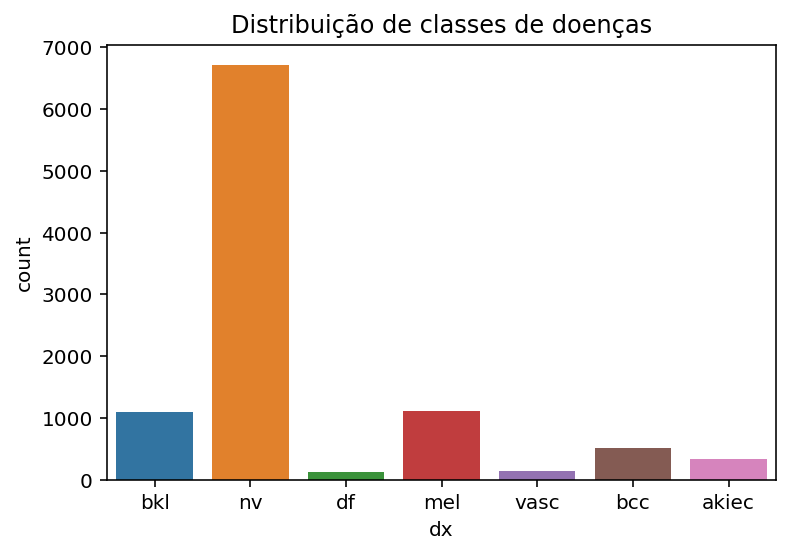

In [14]:
# Grafico de distribuição de classes de doenças
sns.countplot(x = 'dx', data = cancer)
plt.title('Distribuição de classes de doenças')

Com aproxidamente 7000 os Nevos melanocíticos(nv) são a classe de doenças de pele mais frequente nas pessoas. Estes são pequenas manchas marrons regulares na pele, salientes ou não. São popularmente conhecidos por pintas e sinais.

---
**Podemos analisar a distribuição de doenças em diferentes sexos**

In [15]:
# Distribuição de doenças em diferentes sexos
doenca_sex = cancer['sex'].value_counts()

In [16]:
# Assim como a distribuição por classe, a distribuição por sexo também não apresenta um equilibrio
doenca_sex

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

Text(0.5, 1.0, 'Distribuição de doenças por sexo')

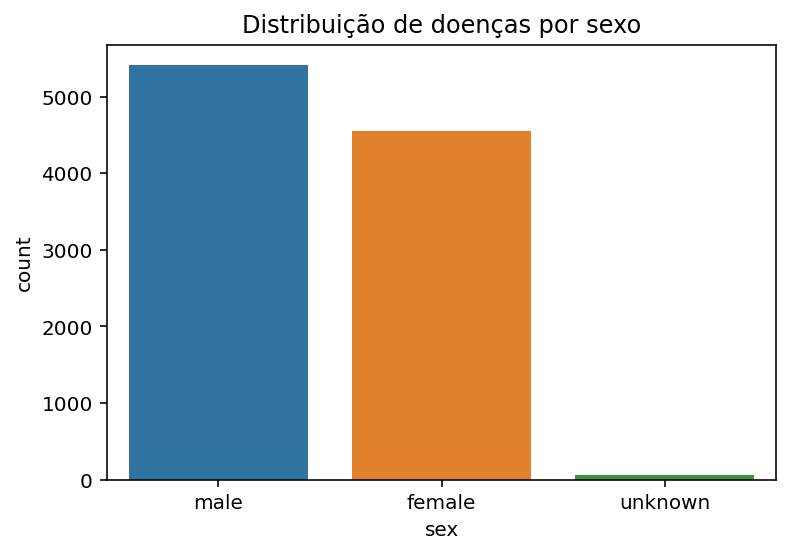

In [17]:
# Grafico de distribuição de doenças por diferente sexos
sns.countplot(x = 'sex', data = cancer)
plt.title('Distribuição de doenças por sexo')

No grafico de destribuição por idade de acordo com o nosso dataset, o sexo masculino apresentou mais doenças de pele.

---
**Distribuição de doença por idade**

In [18]:
# Distribuição de doenças por idade
doenca_age = cancer['age'].value_counts()

In [19]:
# Destribuição desiquilibrada
doenca_age

45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
51.0      57
10.0      41
0.0       39
Name: age, dtype: int64

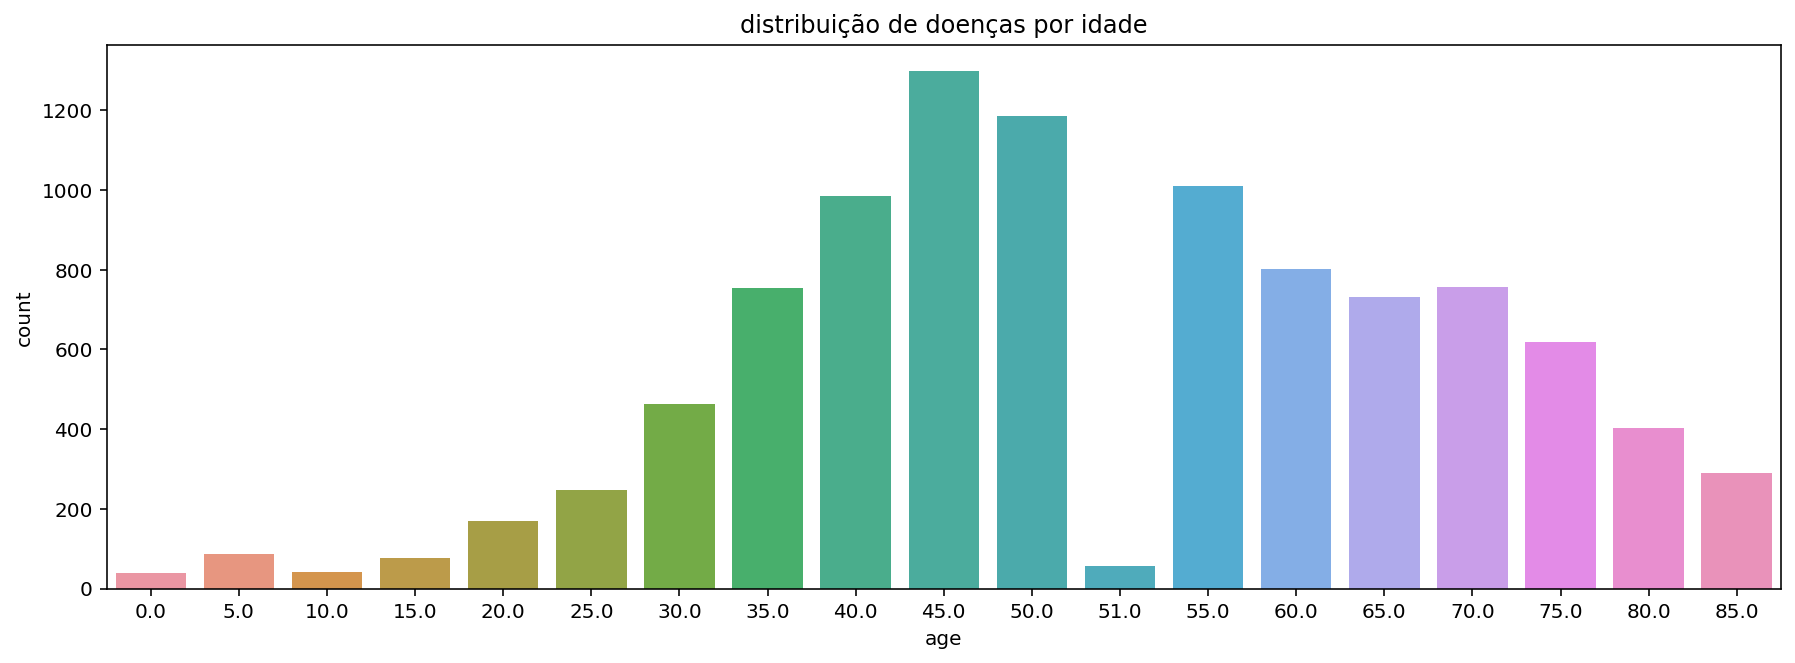

In [20]:
# Grafico de distribuição de doenças por idade
plt.figure(figsize=(15,5))
sns.countplot(x = 'age', data = cancer)
plt.title('distribuição de doenças por idade')
plt.show()

Entre 45 e 50 anos existe um alto numero de pessoas com doenças de pele.

## Mostrando os gráficos juntos
**ANÁLISE UNIVARIADA**

<AxesSubplot:title={'center':'dx'}, ylabel='Count'>

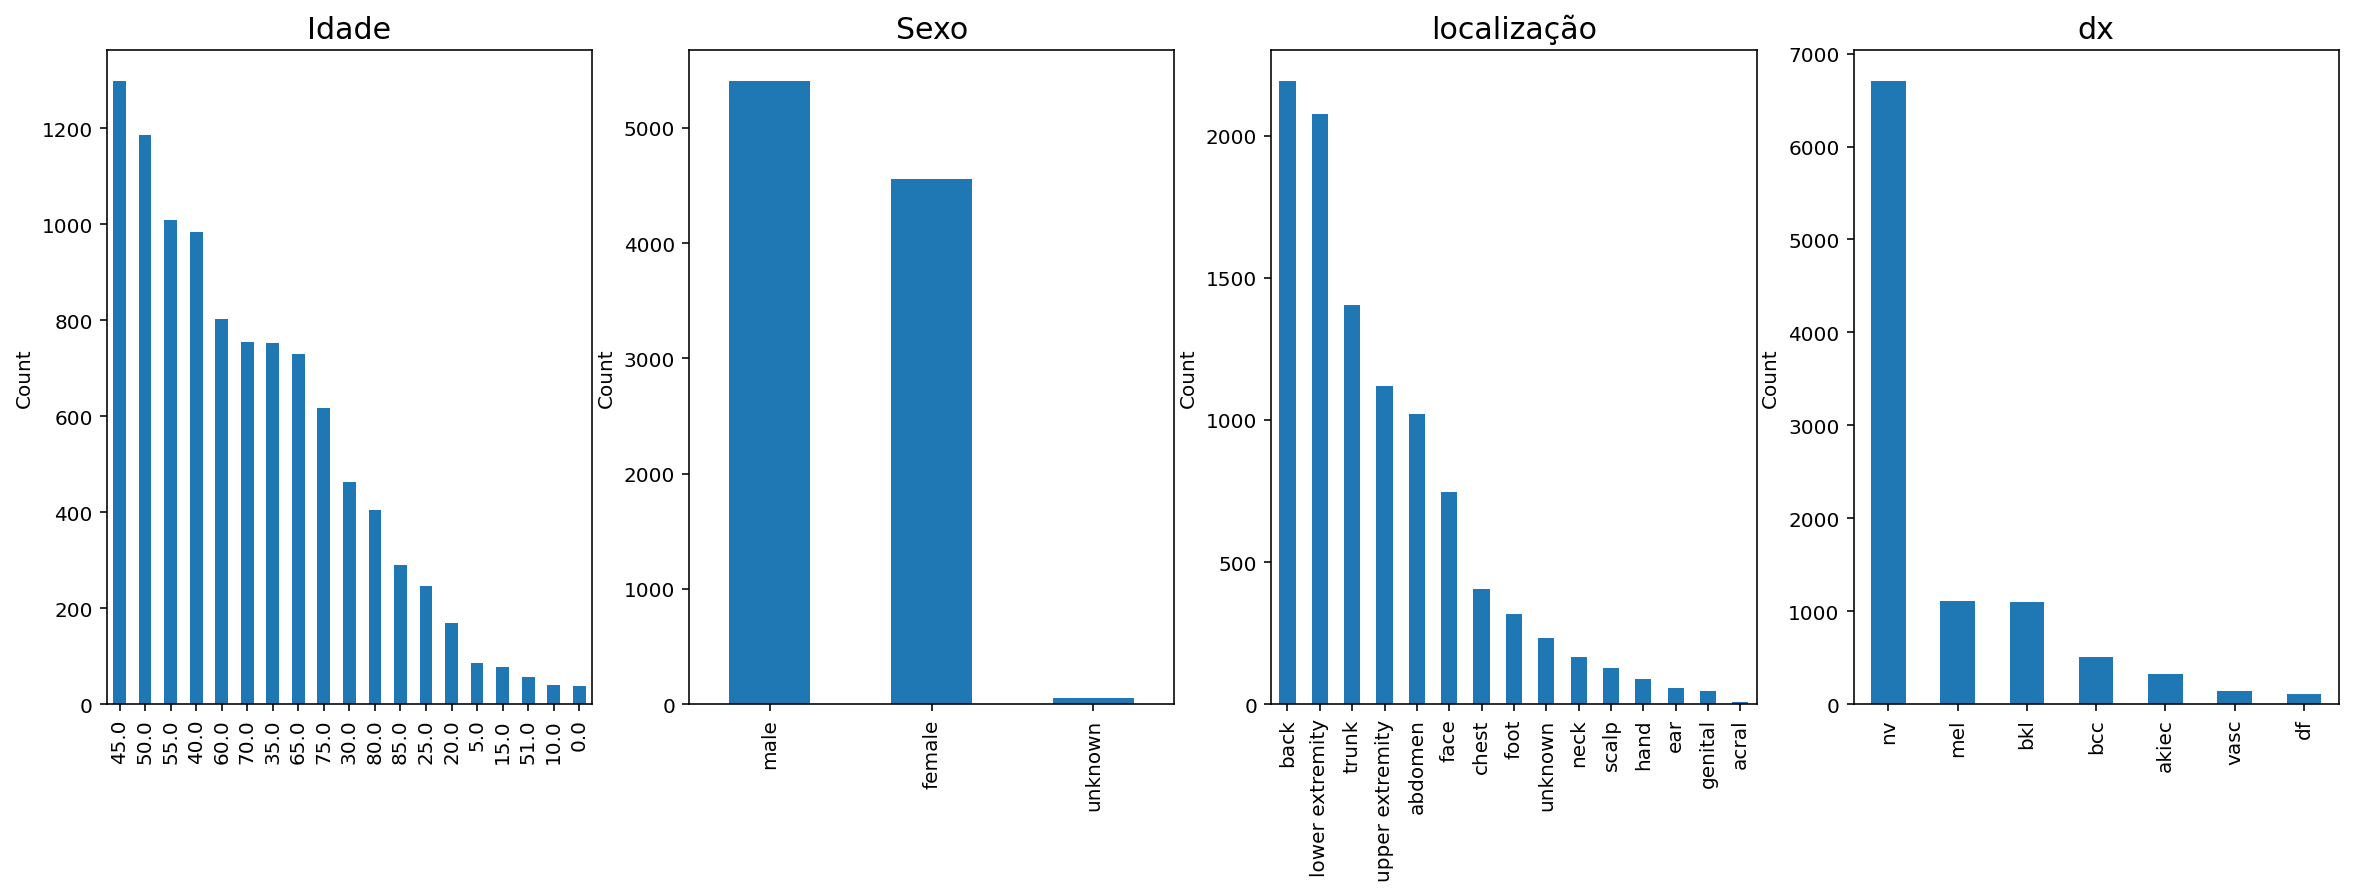

In [21]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)
plt.subplot(2,4,1)
plt.title("Idade", fontsize=15)
plt.ylabel("Count")
cancer['age'].value_counts().plot.bar()

plt.subplot(2,4,2)
plt.title("Sexo", fontsize=15)
plt.ylabel("Count")
cancer['sex'].value_counts().plot.bar()

plt.subplot(2,4,3)
plt.title("localização",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
cancer['localization'].value_counts().plot.bar()

plt.subplot(2,4,4)
plt.title("dx",fontsize=15)
plt.ylabel("Count")
cancer['dx'].value_counts().plot.bar()

## Grafico de formato de Pizza

**Tipo de doença de pele:**

**nv:** nevos melanocíticos - 69,9%<br>
**mel:** Melanoma - 11,1%<br>
**bkl:** Lesões tipo ceratose benigna - 11,0%<br>
**bcc:** carcinoma basocelular - 5,1%<br>
**akiec:** ceratoses actínicas - 3,3%<br>
**vasc:** lesões vasculares-1,4%<br>
**df:** Dermatofibroma - 1,1%<br>


**Como a doença de pele foi descoberta:**

**histo** - histopatologia - 53,3%<br>
**follow_up** - exame de acompanhamento - 37,0%<br>
**consenso** - consenso de especialistas - 9,0%<br>
**confocal** - confirmação por microscopia confocal in vivo - 0,7%<br>

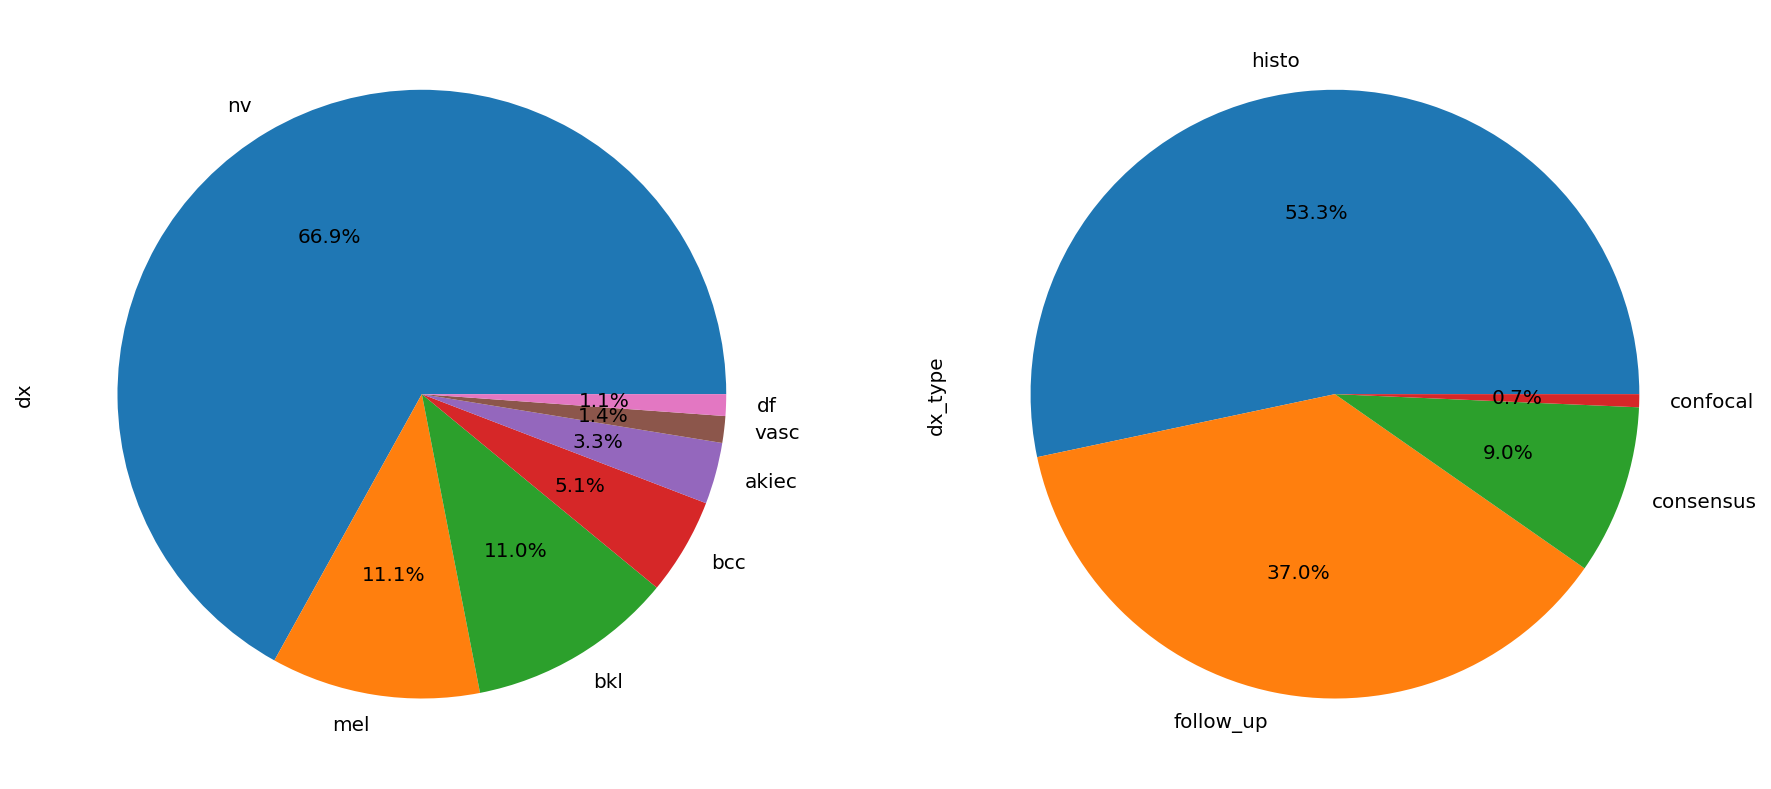

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
cancer['dx'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(1,2,2)
cancer['dx_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

**ANÁLISE BIVARIADA**

<AxesSubplot:title={'center':'Localização VS Sexo'}, xlabel='count', ylabel='localization'>

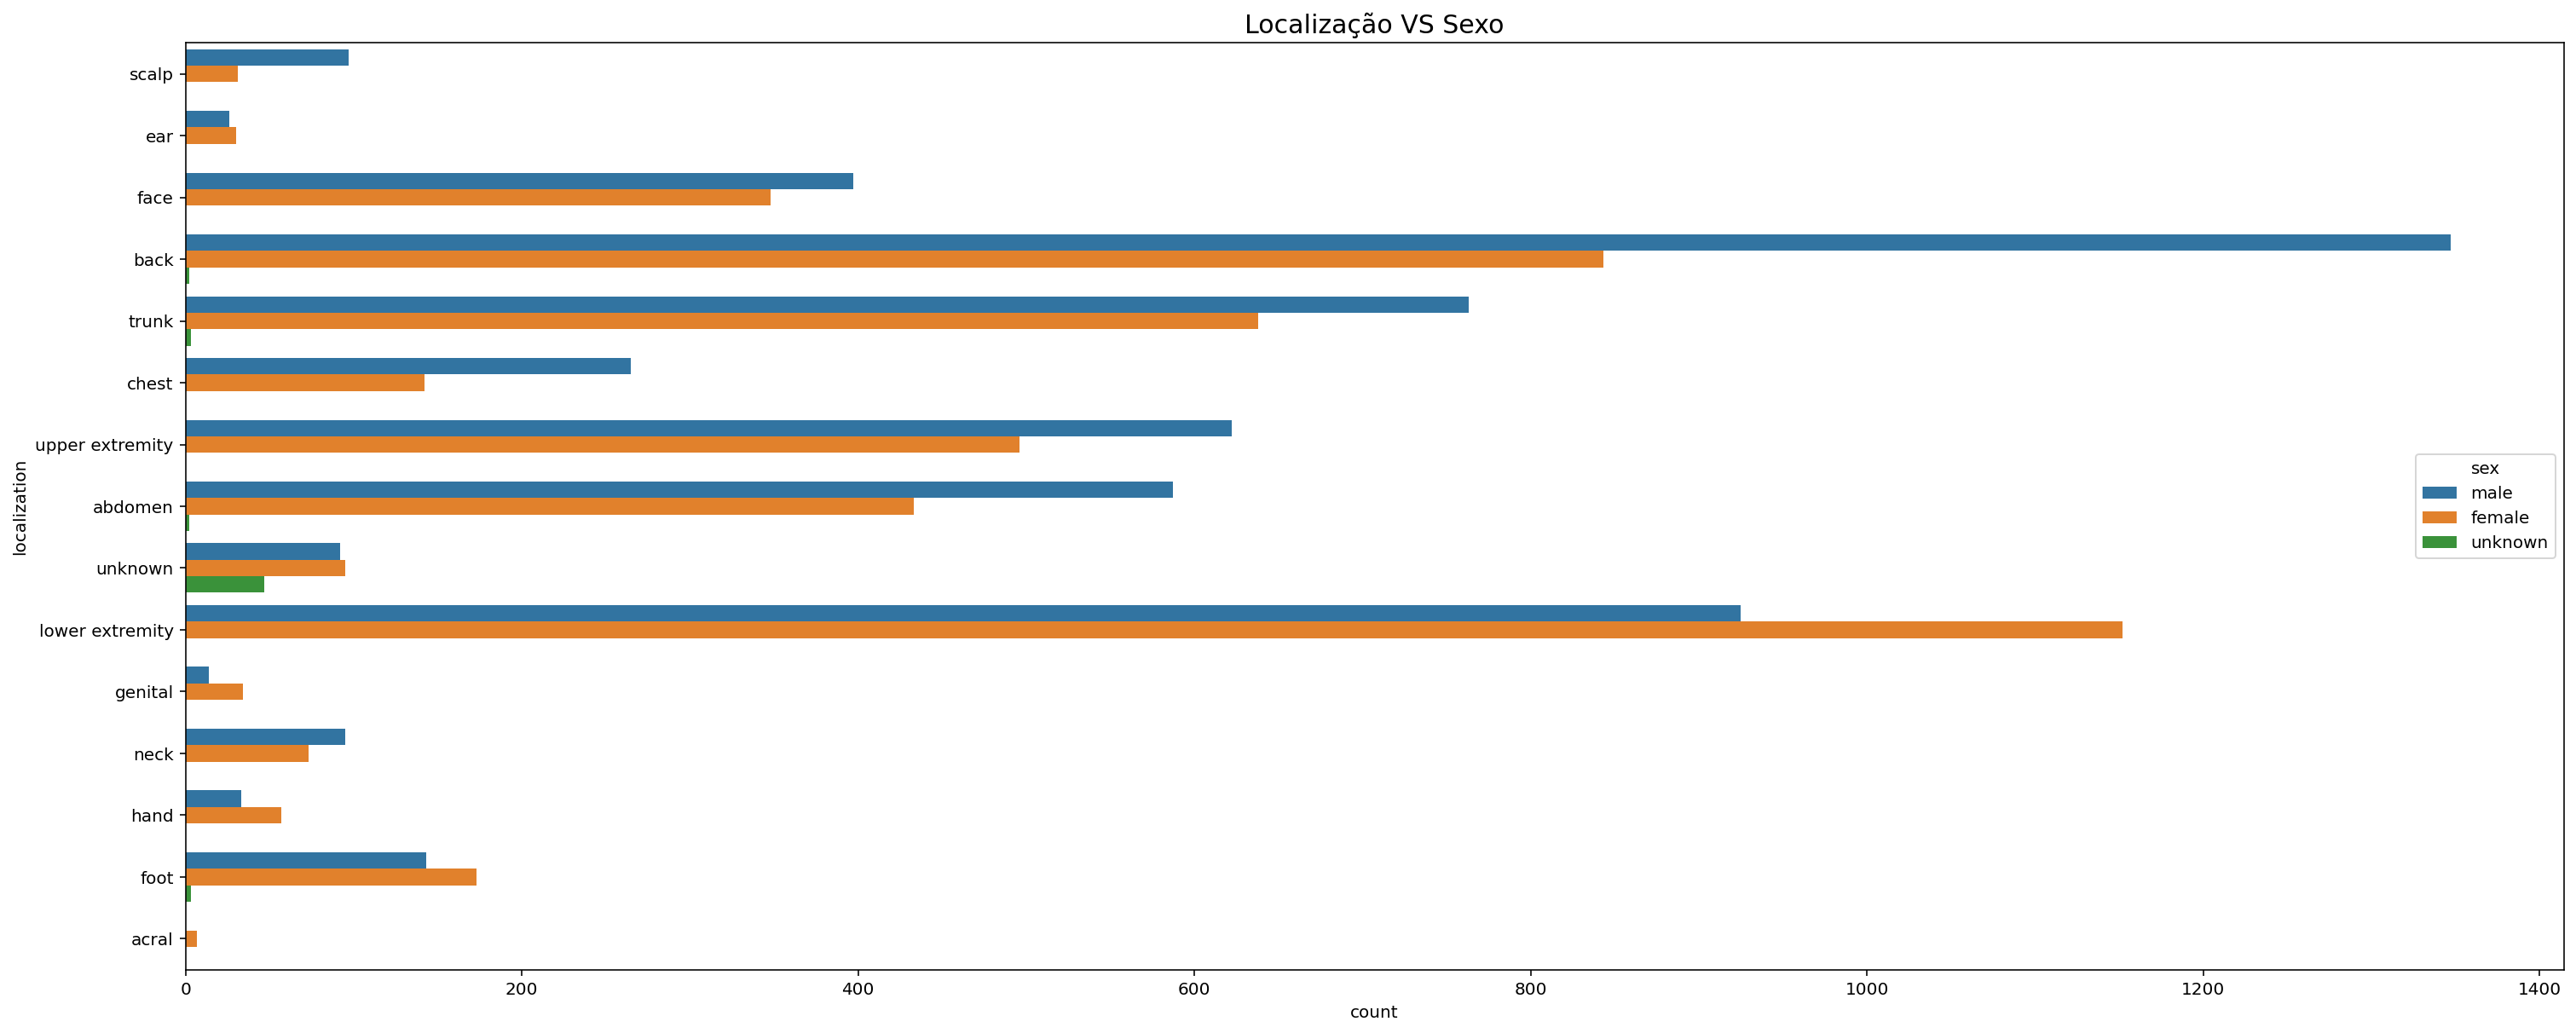

In [23]:
plt.figure(figsize=(25,10))
plt.title('Localização VS Sexo',fontsize = 15)
sns.countplot(y='localization', hue='sex',data=cancer)

Podemos analisar que o sexo masculino apresenta mais doenças de pele localizadas na costas, enquanto o sexo feminino apresenta maior nmero de
casos nas extremidades mais baixas.

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Localização VS Tipo de doença de pele',fontsize = 15)
sns.countplot(y='localization', hue='dx',data=cancer)

<AxesSubplot:title={'center':'Sexo VS Tipo de doença de pele'}, xlabel='count', ylabel='sex'>

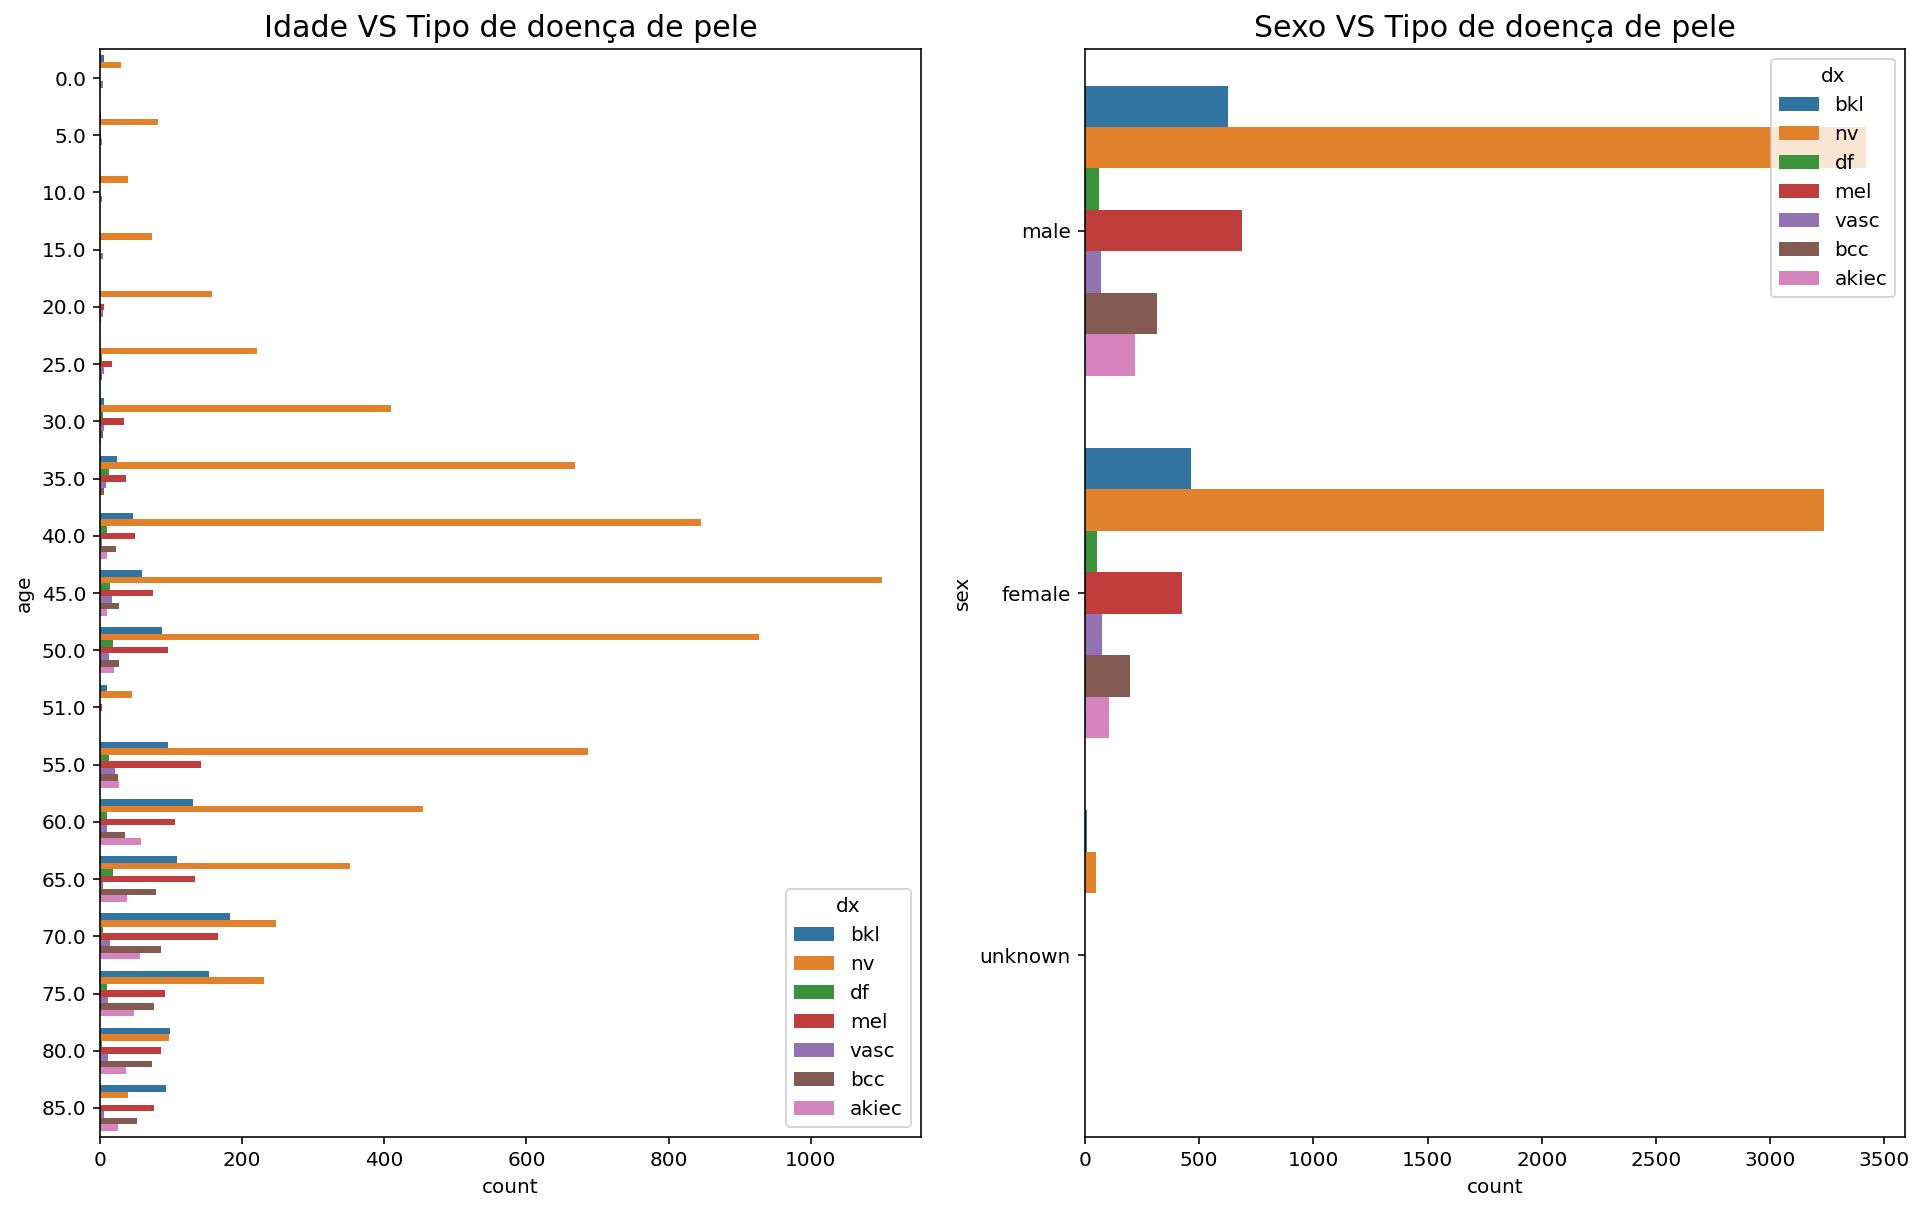

In [25]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('Idade VS Tipo de doença de pele',fontsize = 15)
sns.countplot(y='age', hue='dx',data=cancer)
plt.subplot(132)
plt.title('Sexo VS Tipo de doença de pele',fontsize = 15)
sns.countplot(y='sex', hue='dx',data=cancer)

Nos gráficos acima é possivel notar que aos 45 anos a maioria das pessoas apresentam a doença nevos melanocíticos, além disso, essa doença é a mais frequente tanto para o sexo masculino quanto para o feminino.   